# Bollinger Momentum
* This strat goes long, short and also neutral
* Not always in the market (typically less than 50% of the time)
* Small drawdowns and high sharpe BUT return's are not as good as other strats
* Comm. and slippage don't have a large effect since it only trades +-2 times per month and then trades go from long or short to netural so a single trade per stance change
* Lookback of 7 or 21 works well (14 not bad either, so 7's!)
* Lookback of 7 spends less time in market and has better sharpe
* Lookback of 21 with distance of 1 spends more time in market and has higher return but lower sharpe and higher drawdowns
* So 7,2 and 21,1 seem to work best with 7,2 less "risky"

In [109]:
# Imports
%matplotlib inline
import quandl
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from collections import defaultdict
from __future__ import unicode_literals
import backtesters
reload(backtesters)
from backtesters import MABacktester, RSIBacktester, PanteraBacktester, \
    MACDBacktester, PortfolioBacktester, BuyIfUpBacktester, NewHighBacktester, StochasticBacktester, \
    SARBacktester, MAStopLossBacktester, WilliamsRBacktester, MAShortOnlyBacktester, YaleBacktester, \
    MajoritySignalBacktester, DonchianBacktester, TripleMABacktester, BollingerMR, BollingerMomentum, \
    MAAssymetricBacktester, HABacktester, MAStopLossBacktester2, HigherPriceBacktester
import utils

In [3]:
# Data from Coinmarketcap
coinmarketcap = pd.read_hdf('coinmarketcap','BTCUSD')

In [4]:
# Data from Bitstamp
bitstamp = quandl.get("BITSTAMP/USD")
bitstamp['Open'] = bitstamp['Last'].shift(1)
bitstamp.dropna(inplace=True)

In [63]:
# Data from Bitmex
bitmex = pd.read_hdf('bitmex','BXBT')

In [6]:
# Get price data from Quandl
bitcoin = quandl.get("BCHAIN/MKPRU")
bitcoin = bitcoin.shift(-1) # data set has daily open, we want daily close
bitcoin = bitcoin.loc['2011-01-01':] # Remove the 0's
bitcoin.columns = ['Last']

In [7]:
# Data from Bitfinex
bitfinex = quandl.get("BITFINEX/BTCUSD")

In [111]:
#data = bitstamp['Last']
#data = bitcoin['Last']
data = bitmex['close']
#data = coinmarketcap['Close']
#data = bitfinex['Last']

strat = BollingerMomentum(data, lookback=7,distance=2, slippage=0.005)
#strat = MABacktester(data, ms=1, ml=7, slippage=0.005)

strat.results()

{'Current_stance': -1,
 'Market': 176.49,
 'Market_pa': 71.59,
 'Market_sharpe': 0.6,
 'Sharpe': 1.8,
 'Strategy': 552.48,
 'Strategy_pa': 170.67,
 'Time_in_market': 32.08,
 'Time_long': 17.13,
 'Time_short': 14.95,
 'Trades': 47,
 'Trades_per_month': 2.08,
 'Unrealised': -0.19,
 'Years': 1.88}

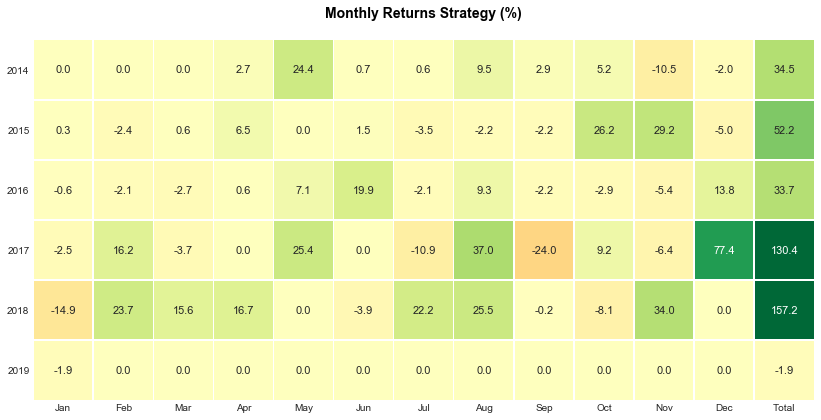

In [97]:
strat.plot_heatmap(figsize=(14,10));

In [81]:
strat.drawdowns()

,dd,high,low,highd,lowd,days,recoveryd,rdays
0,44.78,2.58932,1.42995,2017-06-12 00:00:00+00:00,2017-07-27 00:00:00+00:00,45 days,2017-08-30 00:00:00+00:00,34 days
1,44.24,9.42833,5.25770,2017-12-17 00:00:00+00:00,2018-01-14 00:00:00+00:00,28 days,2018-02-06 00:00:00+00:00,23 days
2,37.58,10.83089,6.76019,2018-02-06 00:00:00+00:00,2018-02-26 00:00:00+00:00,20 days,2018-05-24 00:00:00+00:00,87 days
3,25.25,3.16520,2.36586,2017-09-15 00:00:00+00:00,2017-10-05 00:00:00+00:00,20 days,2017-10-15 00:00:00+00:00,10 days
4,25.11,19.31503,14.46433,2018-12-16 00:00:00+00:00,2019-01-20 00:00:00+00:00,35 days,2019-01-31 00:00:00+00:00,11 days


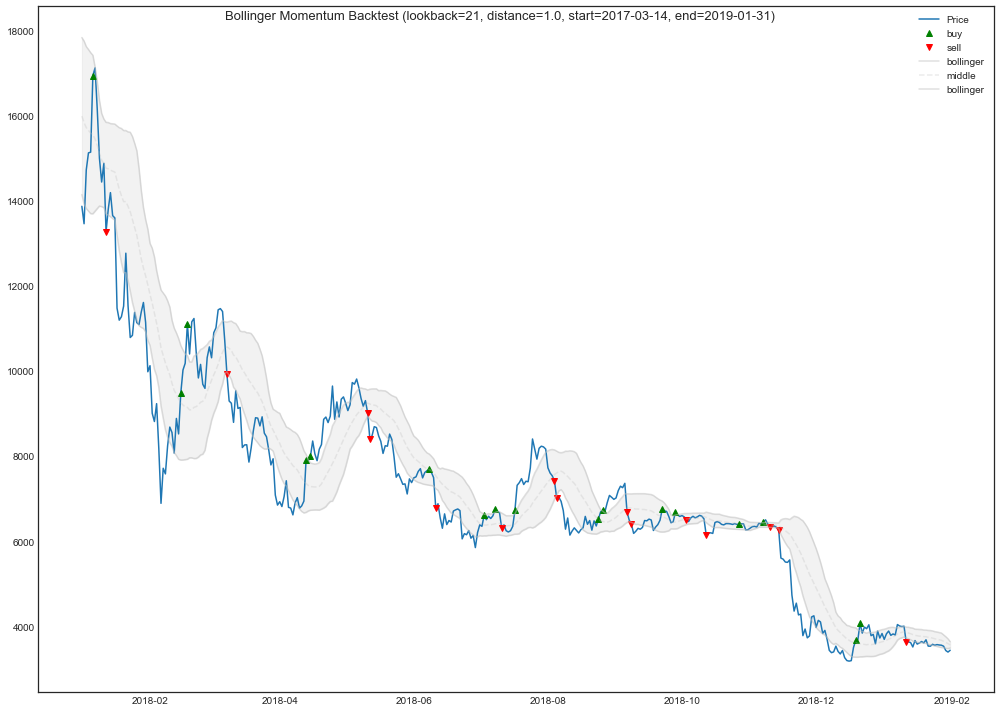

In [77]:
strat.plot(start_date='2018',figsize=(14,10));

In [108]:
strat._df.stance.value_counts()

 0    1039
 1     381
-1     290
Name: stance, dtype: int64